In [2]:
from keras.layers import Dense,Activation
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import to_categorical

/home/drdh/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
protection=np.load("../data/generate_data/protection")

In [4]:
SEQLEN=10
STEP=1

input_protection=[]
label_protection=[]
for i in range(0,len(protection)-SEQLEN,STEP):
    input_protection.append(protection[i:i+SEQLEN])
    label_protection.append(protection[i+SEQLEN])

In [5]:
PROTECTION_TYPE=3
X=np.zeros((len(input_protection),SEQLEN,PROTECTION_TYPE),dtype=np.bool)
y=np.zeros((len(input_protection),PROTECTION_TYPE),dtype=np.bool)
for i,input_pr in enumerate(input_protection):
    for j,pr in enumerate(input_pr):
        X[i,j,pr]=1
    y[i,label_protection[i]]=1

In [6]:
HIDDEN_SIZE=32
BATCH_SIZE=32
NUM_ITERATION=25
NUM_EPOCHS_PER_ITERATION=1
NUM_PREDS_PER_EPOCHS=10

model=Sequential()
model.add(SimpleRNN(HIDDEN_SIZE,return_sequences=False,input_shape=(SEQLEN,PROTECTION_TYPE),unroll=True))
model.add(Dense(PROTECTION_TYPE))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=['acc'])

In [7]:
plot_model(model,to_file="../img/protection_SimpleRNN_model.png",show_shapes=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [8]:
X_val=np.zeros((3,SEQLEN,PROTECTION_TYPE))
y_val=np.zeros((3,PROTECTION_TYPE))
for i in range(3):
    for j in range(SEQLEN):
        X_val[i,j,i]=1
    y_val[i,i]=1

history=model.fit(X,y,batch_size=BATCH_SIZE,epochs=5,validation_data=(X_val,y_val))

Train on 1773 samples, validate on 3 samples
Epoch 1/5
1773/1773 [==============================] - 0s 200us/step - loss: 0.2363 - acc: 0.9600 - val_loss: 0.0321 - val_acc: 1.0000
Epoch 2/5
1773/1773 [==============================] - 0s 91us/step - loss: 0.0489 - acc: 0.9898 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 3/5
1773/1773 [==============================] - 0s 73us/step - loss: 0.0364 - acc: 0.9921 - val_loss: 0.0109 - val_acc: 1.0000
Epoch 4/5
1773/1773 [==============================] - 0s 97us/step - loss: 0.0302 - acc: 0.9932 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 5/5
1773/1773 [==============================] - 0s 94us/step - loss: 0.0267 - acc: 0.9944 - val_loss: 0.0038 - val_acc: 1.0000


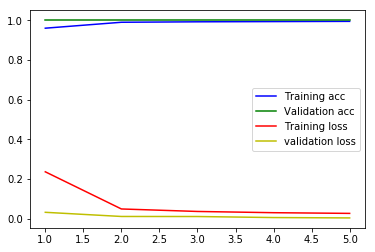

In [9]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label="Training acc")
plt.plot(epochs,val_acc,'g',label="Validation acc")
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'y',label="validation loss")

plt.legend()
#plt.figure()
plt.savefig("../img/protection_SimpleRNN.png")
#plt.show()

In [10]:
model.save("../model/protection_SimpleRNN.h5")
model_r=load_model("../model/protection_SimpleRNN.h5")

In [18]:
X_test=np.zeros((3,1,SEQLEN,PROTECTION_TYPE))
for i in range(3):
    for j in range(SEQLEN):
        X_test[i,0,j,i]=1

ypred=[]
for i in range(3):
    pred=model_r.predict(X_test[i],verbose=0)[0]
    ypred.append(np.argmax(pred))
ypred

[0, 1, 2]

In [11]:
import predict
import imp
imp.reload(predict)

<module 'predict' from '/home/drdh/lx/X-dll/LSTM/model/model_src/predict.py'>

In [21]:
predict.network([10,11,12,3],36,1,[1,4],34,0,4,[18,6,2,17],[18,6,2,7],[18,6,2,7],1)

([0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
 1,
 1,
 [0, 0, 1, 0, 0],
 0,
 0,
 0,
 [0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 0)